# Model Training Experiments

This notebook is used for testing and prototyping model training logic 
before integrating it into the main `src/` Python modules.

**Note:** This is not part of the production code. 
Some code cells may be exploratory or not well-documented.

In [ ]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from src.data import WaveformToMel, MelAugmentor
from src.data.dataset_loader import AudioDatasetLoader
from src.data import AudioAugmentor

In [2]:
# Read the dataset
file_path = "C:\\voice-speaker-binary-classifier\\data"
dataset_loader = AudioDatasetLoader(file_path)

x_train, x_test, y_train, y_test = dataset_loader.load_dataset()
x_test.shape

[2025-11-01 08:50:43] [INFO] - Initialized AudioDatasetLoader with path=C:\voice-speaker-binary-classifier\data, sr=16000, batch_size=32
[2025-11-01 08:50:43] [INFO] - Loading dataset from directory... this may take a few seconds.


Found 863 files belonging to 2 classes.


[2025-11-01 08:50:43] [INFO] - Dataset loaded successfully. Converting to NumPy arrays...
[2025-11-01 08:50:46] [INFO] - Collected 27 batches. Concatenating into full arrays...
[2025-11-01 08:50:46] [INFO] - Converting to 26 batches with batch_size of 32
[2025-11-01 08:50:46] [INFO] - Final dataset shape: X=(26, 32, 48000, 1), Y=(26, 32)
[2025-11-01 08:50:46] [INFO] - Splitting dataset into train and test sets (80/20)...
[2025-11-01 08:50:46] [INFO] - x_train: (20, 32, 48000, 1), y_train: (20, 32)
[2025-11-01 08:50:46] [INFO] - x_test: (6, 32, 48000, 1), y_test: (6, 32)


(6, 32, 48000, 1)

In [3]:
y_test.shape

(6, 32)

In [4]:
# audio augmenting

audio_augmentor = AudioAugmentor()

x_train_aug, y_train_aug = audio_augmentor.run(x_train, y_train, 3, True)

[2025-11-01 06:24:26] [INFO] - Audio Augmentation initialized with sr=16000, batch_size=32
[2025-11-01 06:24:26] [INFO] - 🚀 Starting audio augmentation | num_aug=3, shuffle=True
[2025-11-01 06:24:26] [INFO] - 🔁 Running augmentation round 1/3
[2025-11-01 06:24:39] [INFO] - 🔁 Running augmentation round 2/3
[2025-11-01 06:24:48] [INFO] - 🔁 Running augmentation round 3/3
[2025-11-01 06:24:55] [INFO] - 🔀 Shuffled augmented dataset
[2025-11-01 06:24:55] [INFO] - ✅ Augmentation complete. Final dataset shape: (80, 32, 48000, 1), (80, 32)


In [5]:
# Mel spectrogram conversion and augmentation

wav_to_mel = WaveformToMel()
x_mel, y_mel = wav_to_mel.run(x_train_aug, y_train_aug)

mel_augmentor = MelAugmentor()

x_mel_aug, y_mel_aug = mel_augmentor.run(x_mel, y_mel, 2)

[2025-11-01 06:24:55] [INFO] - 🎧 Converting waveform batches to mel-spectrograms...
[2025-11-01 06:24:56] [INFO] - Converted batch 1/80
[2025-11-01 06:24:56] [INFO] - Converted batch 2/80
[2025-11-01 06:24:56] [INFO] - Converted batch 3/80
[2025-11-01 06:24:56] [INFO] - Converted batch 4/80
[2025-11-01 06:24:56] [INFO] - Converted batch 5/80
[2025-11-01 06:24:56] [INFO] - Converted batch 6/80
[2025-11-01 06:24:57] [INFO] - Converted batch 7/80
[2025-11-01 06:24:57] [INFO] - Converted batch 8/80
[2025-11-01 06:24:57] [INFO] - Converted batch 9/80
[2025-11-01 06:24:57] [INFO] - Converted batch 10/80
[2025-11-01 06:24:57] [INFO] - Converted batch 11/80
[2025-11-01 06:24:57] [INFO] - Converted batch 12/80
[2025-11-01 06:24:57] [INFO] - Converted batch 13/80
[2025-11-01 06:24:58] [INFO] - Converted batch 14/80
[2025-11-01 06:24:58] [INFO] - Converted batch 15/80
[2025-11-01 06:24:58] [INFO] - Converted batch 16/80
[2025-11-01 06:24:58] [INFO] - Converted batch 17/80
[2025-11-01 06:24:58] [I

In [4]:
wav_to_mel = WaveformToMel()

x_test_mel, y_test_mel = wav_to_mel.run(x_test, y_test)

[2025-11-01 08:51:44] [INFO] - 🎧 Converting waveform batches to mel-spectrograms...
[2025-11-01 08:51:49] [INFO] - Converted batch 1/6
[2025-11-01 08:51:49] [INFO] - Converted batch 2/6
[2025-11-01 08:51:49] [INFO] - Converted batch 3/6
[2025-11-01 08:51:49] [INFO] - Converted batch 4/6
[2025-11-01 08:51:49] [INFO] - Converted batch 5/6
[2025-11-01 08:51:49] [INFO] - Converted batch 6/6
[2025-11-01 08:51:49] [INFO] - ✅ Mel conversion completed. Final shape: (6, 32, 64, 188, 1)


In [5]:
x_test_mel.shape, y_test_mel.shape

((6, 32, 64, 188, 1), (6, 32))

In [6]:
test_x = x_test_mel.reshape(-1, 64, 188, 1)
test_y = y_test_mel.reshape(-1, 1)

test_x.shape, test_y.shape

((192, 64, 188, 1), (192, 1))

In [9]:
import matplotlib.pyplot as plt

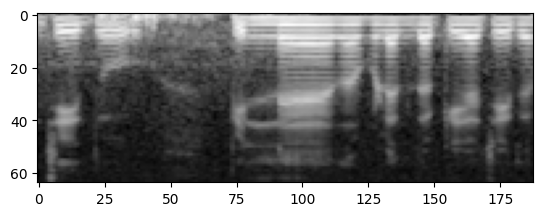

In [10]:
plt.imshow(x_mel_aug[4][26], cmap='gray')

## Let's create the model, train it and rock it

In [11]:
x_mel_train = x_mel_aug.reshape(-1, 64, 188, 1)
y_mel_train = y_mel_aug.reshape(-1, 1)
x_mel_train.shape

(7680, 64, 188, 1)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 188, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')

])

c:\voice-speaker-binary-classifier\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 186, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 93, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 93, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 91, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 21, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 21, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16128)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,258,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,351,233 (31.86 MB)

 Trainable params: 8,351,233 (31.86 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


callbacks = [
    EarlyStopping(patience=7, start_from_epoch=3, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=4)
]

In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics = ['accuracy', 'recall', 'precision']
)

In [16]:
history = model.fit(
    x_mel_train,
    y_mel_train,
    epochs=20,
    batch_size=32,
    verbose=1,
    callbacks=callbacks,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 56s 278ms/step - accuracy: 0.6281 - loss: 0.6422 - precision: 0.5792 - recall: 0.0458 - val_accuracy: 0.7259 - val_loss: 0.5024 - val_precision: 0.8789 - val_recall: 0.3322 - learning_rate: 0.0010
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 53s 276ms/step - accuracy: 0.8192 - loss: 0.4164 - precision: 0.7580 - recall: 0.7636 - val_accuracy: 0.8737 - val_loss: 0.3580 - val_precision: 0.8300 - val_recall: 0.8441 - learning_rate: 0.0010
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 54s 281ms/step - accuracy: 0.8831 - loss: 0.2918 - precision: 0.8306 - recall: 0.8665 - val_accuracy: 0.9232 - val_loss: 0.2025 - val_precision: 0.8746 - val_recall: 0.9339 - learning_rate: 0.0010
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 58s 302ms/step - accuracy: 0.9180 - loss: 0.2033 - precision: 0.8848 - recall: 0.8993 - val_accuracy: 0.9323 - val_loss: 0.1728 - val_precision: 0.8762 - val_recall: 0.9593 - learning_rate: 0.0010
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 56s 294ms/st

In [ ]:
model.save("voice_speaker_model_v1.keras")

In [9]:
test_loss, test_accuracy, test_recall, test_precision = model.evaluate(test_x, test_y)

y_pred = model.predict(test_x)
binary_pred = (y_pred > 0.5).astype(int)

f1 = f1_score(test_y, binary_pred)
class_report = classification_report(test_y, binary_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9740 - loss: 0.2166 - precision: 0.9670 - recall: 0.9778
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


In [10]:
print(f"Report {class_report}")
print(f"F1 score {f1}")

Report               precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       0.97      0.98      0.97        90

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

F1 score 0.9723756906077348


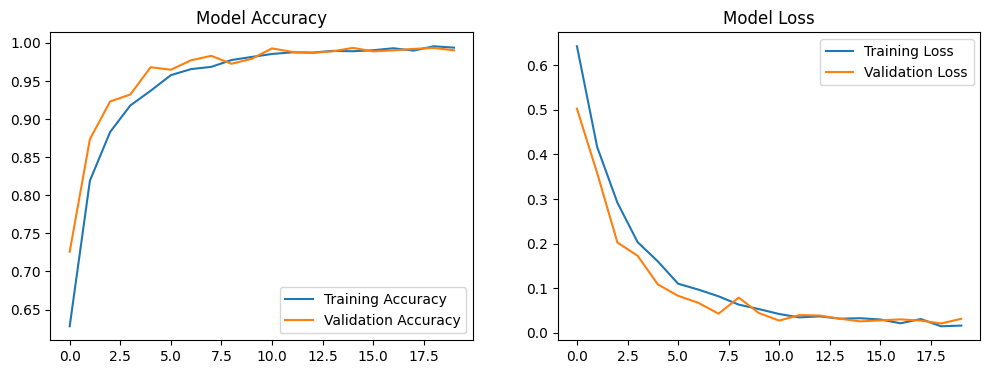

In [19]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

In [1]:
print("Training complete.")

Training complete.


In [2]:
import keras

In [4]:
model = keras.saving.load_model("C:\\voice-speaker-binary-classifier\\models\\voice_speaker_model_v1.keras")

In [5]:
import librosa
import numpy as np

In [21]:
file_path = "C:\\voice-speaker-binary-classifier\\notebooks\\data\\Voice 006.m4a"

data, sr = librosa.load(file_path, sr=16000, mono=True)

import IPython.display as ipd

ipd.Audio(data, rate=sr)

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
predict_speaker("C:\\voice-speaker-binary-classifier\\notebooks\\data\\Voice 006.m4a", model)

Speaker uwais detected  (Confidence: 1.000)


In [13]:
def predict_speaker(file_path, model, threshold=0.5, sr=16000, duration=3):
    # Load audio
    data, _ = librosa.load(file_path, sr=sr, duration=duration, mono=True)

    # Padding
    if len(data) < sr * duration:
        padding = sr * duration - len(data)
        data = np.pad(data, (0, padding), mode='constant')
    
    # Mel-spectrogram (64 x ~188)
    mel_db = librosa.power_to_db(
        librosa.feature.melspectrogram(y=data, sr=sr, n_mels=64, n_fft=1024, hop_length=256),
        ref=np.max
    )
    
    # Normalize and reshape for CNN
    mel_norm = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min() + 1e-9)
    mel_norm = mel_norm[np.newaxis, ..., np.newaxis]  # shape: (1, 64, time, 1)
    
    # Predict
    y_pred = model.predict(mel_norm, verbose=0)[0][0]
    
    # Decision
    label = "Speaker uwais detected" if y_pred > threshold else "Speaker other detected"
    print(f"{label}  (Confidence: {y_pred:.3f})")
